<a href="https://colab.research.google.com/github/pkv-woodstock/Linear_Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


##Downloading the data



In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7d789814fca0>)

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###Here are some statistics for the numerical columns

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install jovian --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
##Exploratory Analysis and Visualization

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box',color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [ ]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

###Correlation

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

To compute the correlation for categorical columns, they must be converted into numeric columns

In [ ]:
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

####Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns

In [ ]:
medical_df.corr()

<ipython-input-35-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-36-2ba33e22183b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

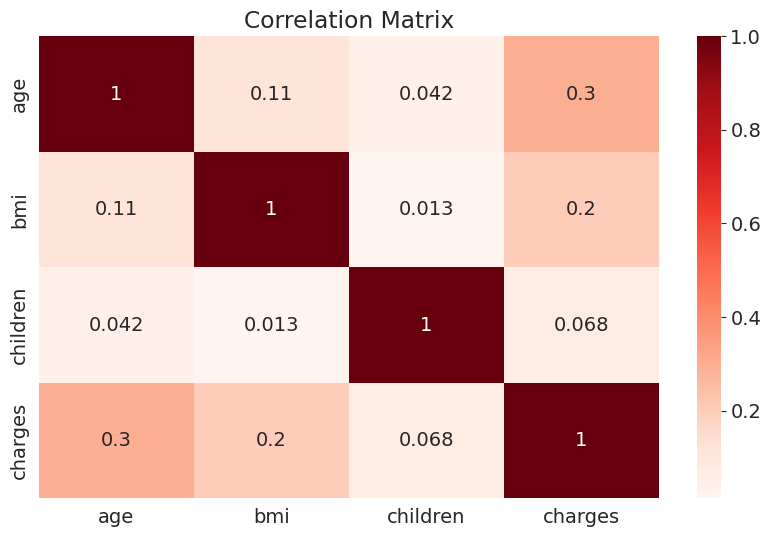

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using a Single Feature

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Let's visualisze the relationship between "age" and "charges"

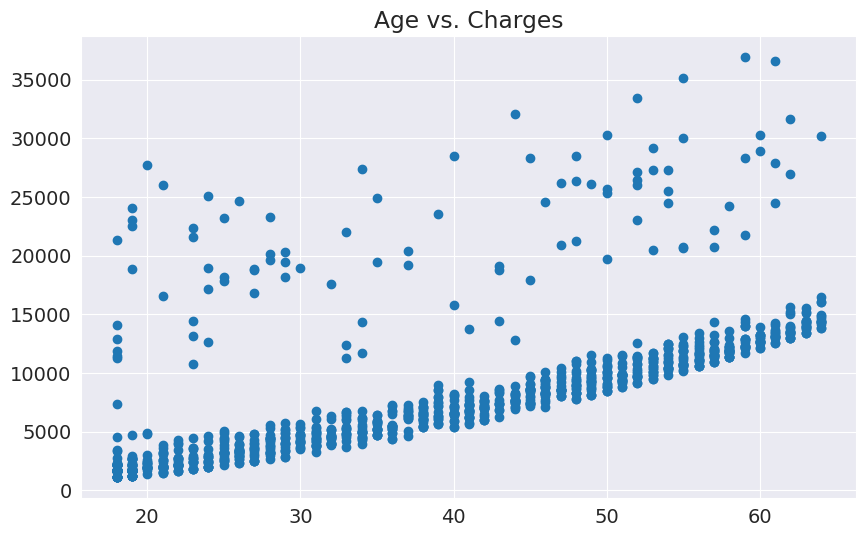

In [ ]:
plt.title('Age vs. Charges')
# sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)
plt.scatter(non_smoker_df.age, non_smoker_df.charges)

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w,b)

Text(0, 0.5, 'Estimated Charges')

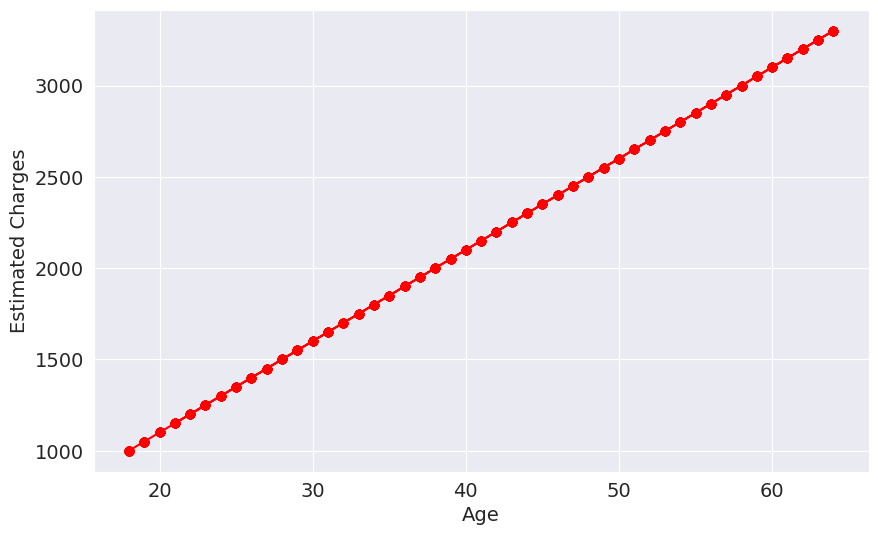

In [ ]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

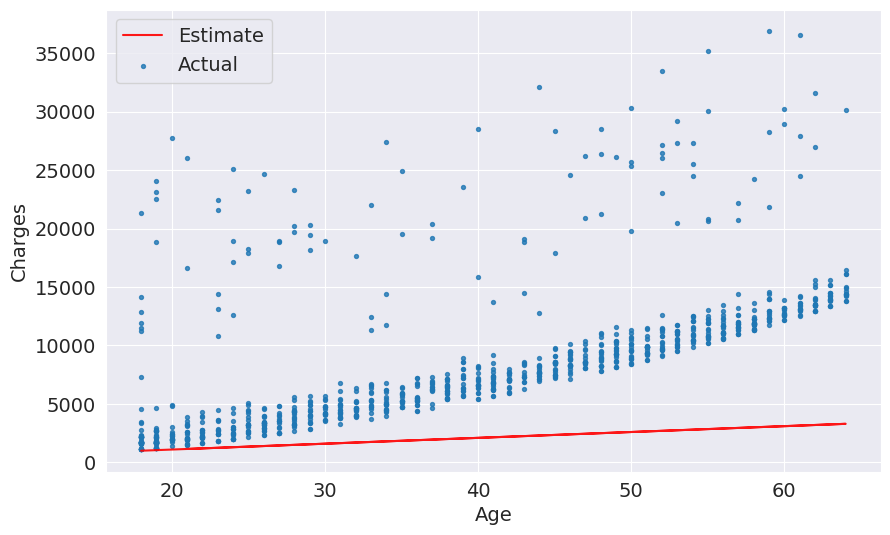

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [ ]:
def try_parameter(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)  # Fixed typo here (alha to alpha)
  plt.scatter(ages, target, s=8, alpha=0.8)  # Fixed typo here (aplha to alpha)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

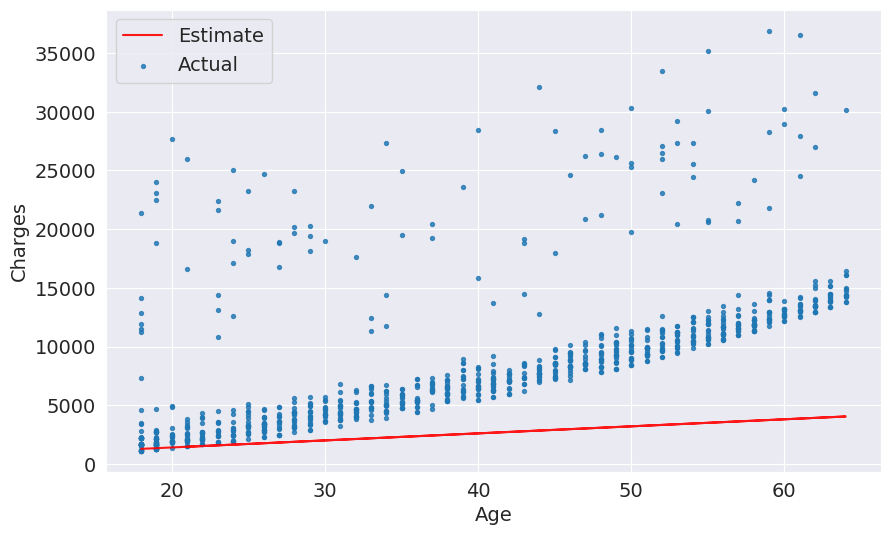

In [ ]:
try_parameter(60, 200)

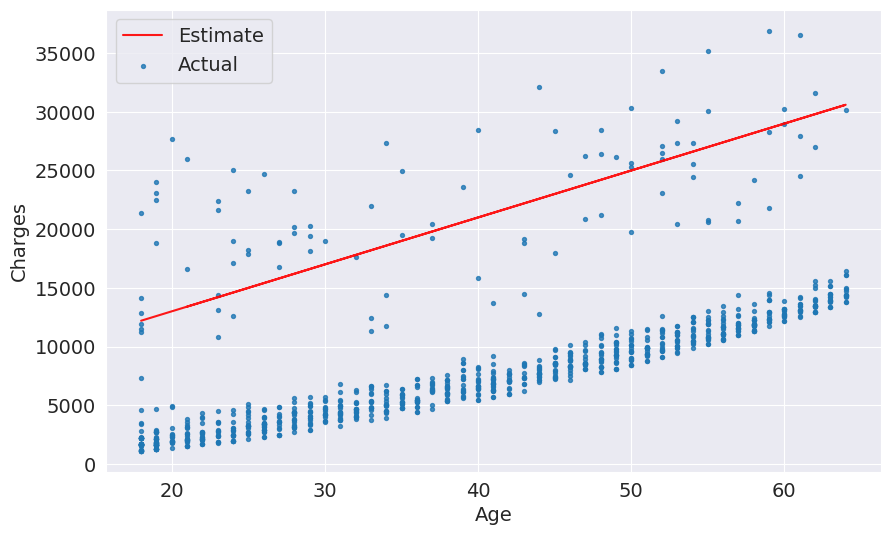

In [ ]:
try_parameter(400, 5000)

###Loss/Cost Function

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

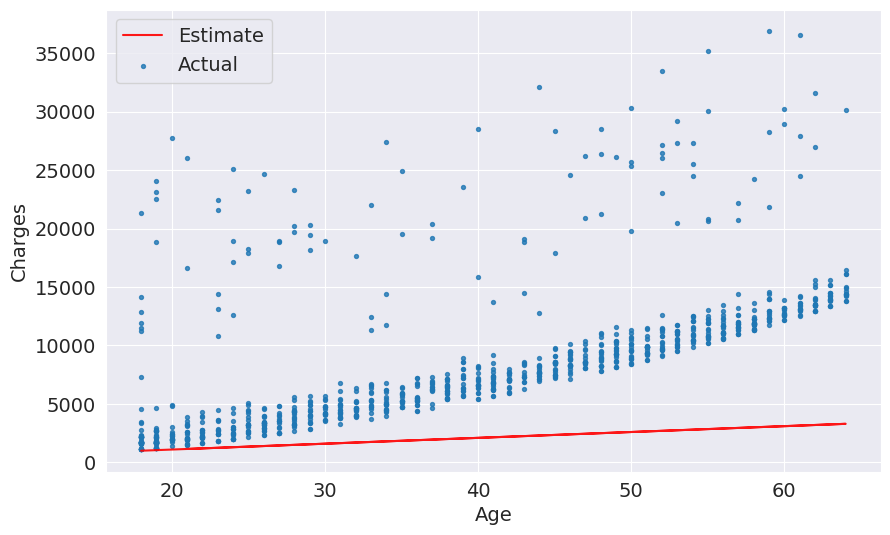

In [ ]:
try_parameter(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
def try_parameter(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

  loss = rmse(target, predictions)
  print("RMSE loss", loss)

RMSE loss 4991.993804156943


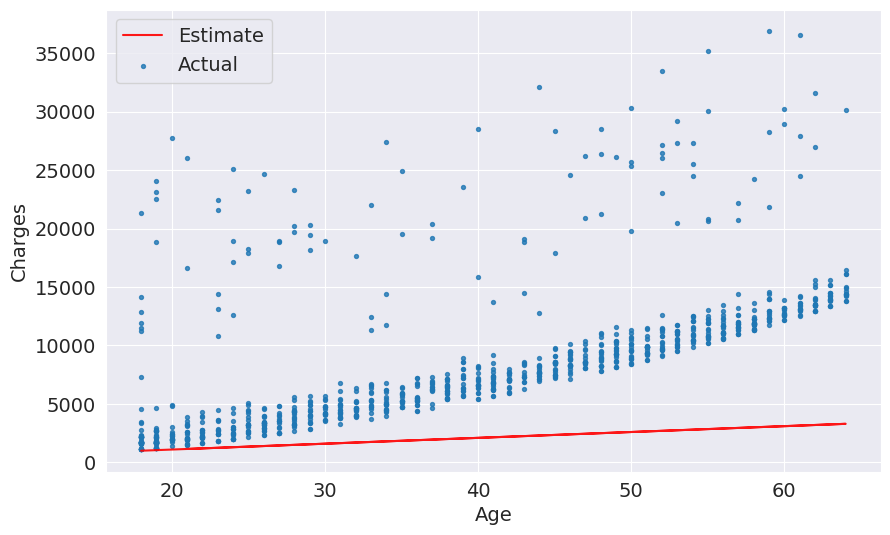

In [ ]:
try_parameter(350, -4000)

##Optimizer

we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data
1. Stochastic Gradient descent
2. Ordinary least squares

##Linear Regression using Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape : ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

RMSE loss 4662.505766636395


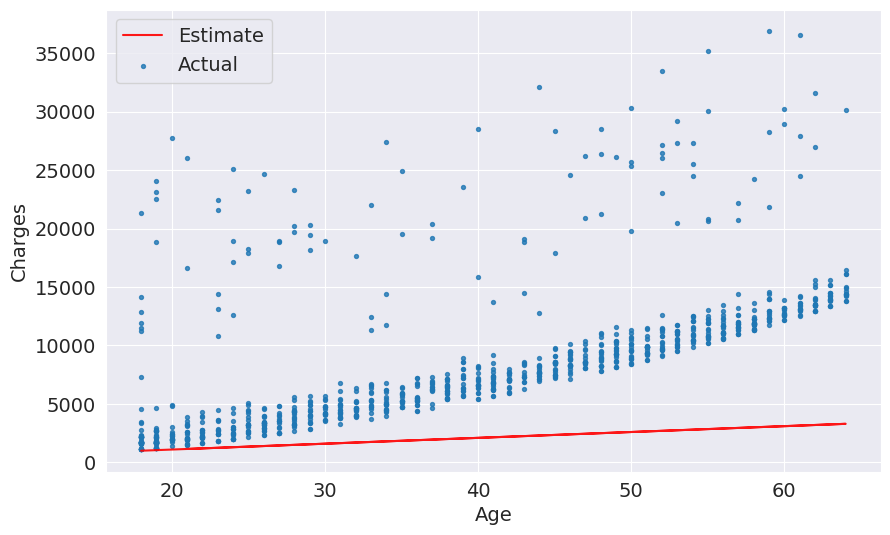

In [ ]:
try_parameter(model.coef_, model.intercept_)

In [99]:
# Create inpute and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


## Linear Regression with multiple features## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [100]:
# Create inpute and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [102]:
# Create inpute and targets
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Usng Categorical Features for Machine Leearning

In [103]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [104]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [105]:
# Create inpute and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [106]:
sex_codes = {'female':0, 'male':1}

In [107]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [110]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [111]:
# Create inpute and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


## One-hot Encoding

In [113]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [114]:
one_hot = enc.transform(medical_df[['region']]).toarray()

In [116]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [117]:
# Create inpute and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

### Feature Scaling

In [119]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [122]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [123]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])

In [124]:
cat_cols= ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [125]:
# Create inpute and targets
inputs = np.concatenate((scaled_inputs, categorical_data),axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515
